In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def create_plot(filePath, labelx, line_style, marker_style):
    df = pd.read_csv(filePath)
    

    # df['se_encrypt_ema'] = df['_se_encrypt'].ewm(span=3, adjust=False).mean()
    # df['se_encrypt_ema'] = df['_se_encrypt'].ewm(span=3, adjust=False).mean()

    # polynomial = np.poly1d(np.polyfit(df['Buffer'], df['se_encrypt_ema'], 3))
    # df['se_encrypt_fitted'] = polynomial(df['Buffer'])

    min_se_encrypt_row = df.loc[df['encrypt'].idxmin()]

    min_buffer_size = min_se_encrypt_row['Buffer']
    min_se_encrypt_value = min_se_encrypt_row['encrypt']

    print(filePath)
    print(f"Buffer size {min_buffer_size} and the corresponding encrypt value is {min_se_encrypt_value}.")


    plt.plot(df['Buffer'], df['encrypt'], marker=marker_style, linestyle=line_style, color='black', markerfacecolor = 'None', label=labelx)
    # plt.yscale('log')
    plt.legend()




csv/log_2MB_image.png.csv
Buffer size 128.0 and the corresponding encrypt value is 0.130851637.
csv/log_4MB_image.png.csv
Buffer size 640.0 and the corresponding encrypt value is 0.289482977.
csv/log_8MB_image.png.csv
Buffer size 128.0 and the corresponding encrypt value is 0.430838439.
csv/log_16MB_image.png.csv
Buffer size 1536.0 and the corresponding encrypt value is 0.804268688.
csv/log_32MB_image.png.csv
Buffer size 768.0 and the corresponding encrypt value is 1.246879452.
csv/previous_custom_data/log_2MB_image.png.csv
Buffer size 1536.0 and the corresponding encrypt value is 0.161195695.
csv/previous_custom_data/log_4MB_image.png.csv
Buffer size 2176.0 and the corresponding encrypt value is 0.325219305.
csv/previous_custom_data/log_8MB_image.png.csv
Buffer size 2944.0 and the corresponding encrypt value is 0.451837687.
csv/previous_custom_data/log_16MB_image.png.csv
Buffer size 2944.0 and the corresponding encrypt value is 0.899093471.
csv/previous_custom_data/log_32MB_image.png.

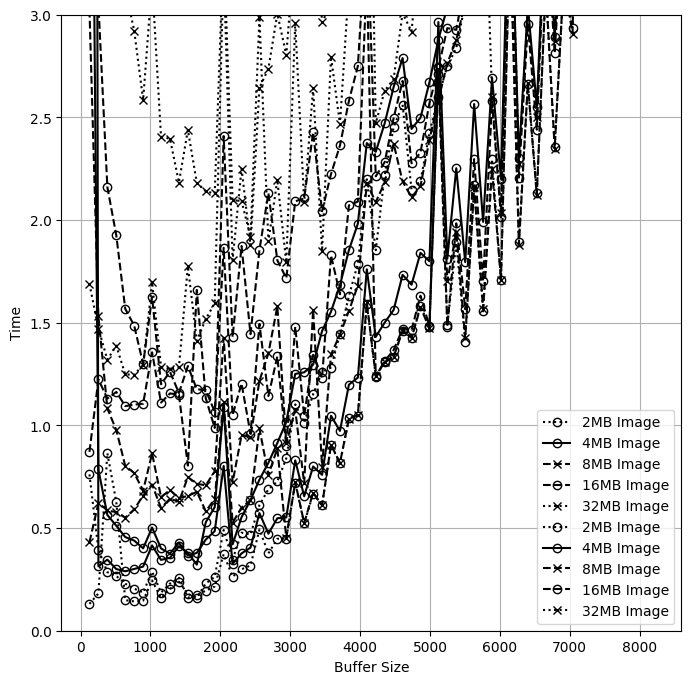

In [27]:
create_plot('csv/log_2MB_image.png.csv', '2MB Image', ':', 'o')
create_plot('csv/log_4MB_image.png.csv', '4MB Image', '-', 'o')
create_plot('csv/log_8MB_image.png.csv', '8MB Image', '--', 'x')
create_plot('csv/log_16MB_image.png.csv', '16MB Image', '--', 'o')
create_plot('csv/log_32MB_image.png.csv', '32MB Image', ':', 'x')
# create_plot('csv/log_64MB_image.png.csv', '64MB Image', '--', 'o')
# create_plot('csv/log_128MB_image.png.csv', '64MB Image', '--', 'o')
# create_plot('csv/log_256MB_image.png.csv', '64MB Image', '--', 'o')
# create_plot('csv/log_512MB_image.png.csv', '64MB Image', '--', 'o')

create_plot('csv/previous_custom_data/log_2MB_image.png.csv', '2MB Image', ':', 'o')
create_plot('csv/previous_custom_data/log_4MB_image.png.csv', '4MB Image', '-', 'o')
create_plot('csv/previous_custom_data/log_8MB_image.png.csv', '8MB Image', '--', 'x')
create_plot('csv/previous_custom_data/log_16MB_image.png.csv', '16MB Image', '--', 'o')
create_plot('csv/previous_custom_data/log_32MB_image.png.csv', '32MB Image', ':', 'x')








plt.xlabel('Buffer Size')
plt.ylabel('Time')
plt.ylim([0, 3])
f = plt.gcf()
f.set_figwidth(8)  
f.set_figheight(8)
plt.grid(True, which='both')

plt.savefig('plots/buffer_size_comparison.svg', format='svg')
plt.show()

/var/folders/vc/q3dwbzbx5cq4zx43xhztb2v00000gn/T/ipykernel_22020/3426437565.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_3072['PQC Cipher'] = 0.000255


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (2,).

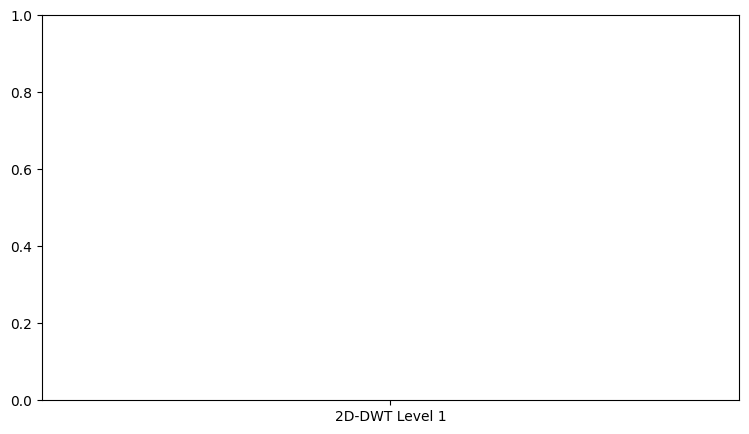

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def create_bar_plot(filePath):
    df = pd.read_csv(filePath)

    row_3072 = df[df['Buffer'] == 3200]
    row_3072['PQC Cipher'] = 0.000255

    custom_labels = ['2D-DWT Level 1', '2D-DWT Level 2', 'PPF1', 'PPF2', 'AES', 'ML-KEM']
    
    
    data = row_3072.iloc[0, 1:].drop('_se_encrypt')
    
    # data = data * 1000
    plt.figure(figsize=(9, 5))
    plt.bar(custom_labels, data, color='black')
    
    
    plt.ylabel('Time')
    plt.yscale('log')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    
    plt.tight_layout()
    plt.savefig('plots/operations_time_comparison.svg', format='svg')

    plt.show()
    

create_bar_plot('csv/log_4MB_image.png.csv')